# Exercise 3

Alissa Trujillo
June 21, 2022
DSC 530

## Exercise 1-1

In [1]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")

Downloaded thinkplot.py


In [2]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")

download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download(
    "https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz"
)

Downloaded 2002FemPreg.dct
Downloaded 2002FemPreg.dat.gz


Read NSFG data into a Pandas DataFrame.

In [3]:
import nsfg

In [4]:
preg = nsfg.ReadFemPreg()
preg.head()

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875


Print the column names.

In [5]:
preg.columns

Index(['caseid', 'pregordr', 'howpreg_n', 'howpreg_p', 'moscurrp', 'nowprgdk',
       'pregend1', 'pregend2', 'nbrnaliv', 'multbrth',
       ...
       'laborfor_i', 'religion_i', 'metro_i', 'basewgt', 'adj_mod_basewgt',
       'finalwgt', 'secu_p', 'sest', 'cmintvw', 'totalwgt_lb'],
      dtype='object', length=244)

Select a single column name.

In [6]:
preg.columns[1]

'pregordr'

Select a column and check what type it is.

In [7]:
pregordr = preg['pregordr']
type(pregordr)

pandas.core.series.Series

Print a column.

In [8]:
pregordr

0        1
1        2
2        1
3        2
4        3
        ..
13588    1
13589    2
13590    3
13591    4
13592    5
Name: pregordr, Length: 13593, dtype: int64

Select a single element from a column.

In [9]:
pregordr[0]

1

Select a slice from a column.

In [10]:
pregordr[2:5]

2    1
3    2
4    3
Name: pregordr, dtype: int64

Select a column using dot notation.

In [11]:
pregordr = preg.pregordr

Count the number of times each value occurs.

In [12]:
preg.outcome.value_counts().sort_index()

1    9148
2    1862
3     120
4    1921
5     190
6     352
Name: outcome, dtype: int64

Check the values of another variable.

In [13]:
preg.birthwgt_lb.value_counts().sort_index()

0.0        8
1.0       40
2.0       53
3.0       98
4.0      229
5.0      697
6.0     2223
7.0     3049
8.0     1889
9.0      623
10.0     132
11.0      26
12.0      10
13.0       3
14.0       3
15.0       1
Name: birthwgt_lb, dtype: int64

Make a dictionary that maps from each respondent's `caseid` to a list of indices into the pregnancy `DataFrame`.  Use it to select the pregnancy outcomes for a single respondent.

In [14]:
caseid = 10229
preg_map = nsfg.MakePregMap(preg)
indices = preg_map[caseid]
preg.outcome[indices].values

array([4, 4, 4, 4, 4, 4, 1])

Select the `birthord` column, print the value counts, and compare to results published in the [codebook](ftp://ftp.cdc.gov/pub/Health_Statistics/NCHS/Dataset_Documentation/NSFG/Cycle6Codebook-Pregnancy.pdf)

In [15]:
birthord = preg['birthord']
preg.birthord.value_counts().sort_index()

1.0     4413
2.0     2874
3.0     1234
4.0      421
5.0      126
6.0       50
7.0       20
8.0        7
9.0        2
10.0       1
Name: birthord, dtype: int64

We can also use `isnull` to count the number of nans.

In [16]:
preg.birthord.isnull().sum()

4445

Select the `prglngth` column, print the value counts, and compare to results published in the [codebook](ftp://ftp.cdc.gov/pub/Health_Statistics/NCHS/Dataset_Documentation/NSFG/Cycle6Codebook-Pregnancy.pdf)

In [17]:
prglngth = preg['prglngth']
preg.prglngth.value_counts().sort_index()

0       15
1        9
2       78
3      151
4      412
5      181
6      543
7      175
8      409
9      594
10     137
11     202
12     170
13     446
14      29
15      39
16      44
17     253
18      17
19      34
20      18
21      37
22     147
23      12
24      31
25      15
26     117
27       8
28      38
29      23
30     198
31      29
32     122
33      50
34      60
35     357
36     329
37     457
38     609
39    4744
40    1120
41     591
42     328
43     148
44      46
45      10
46       1
47       1
48       7
50       2
Name: prglngth, dtype: int64

To compute the mean of a column, you can invoke the `mean` method on a Series.  For example, here is the mean birthweight in pounds:

In [18]:
preg.totalwgt_lb.mean()

7.265628457623368

Create a new column named <tt>totalwgt_kg</tt> that contains birth weight in kilograms.  Compute its mean.  Remember that when you create a new column, you have to use dictionary syntax, not dot notation.

In [22]:
preg['totalwgt_kg'] = preg.birthwgt_lb * 0.453592
preg.totalwgt_kg.mean()

3.0989960695729373

`nsfg.py` also provides `ReadFemResp`, which reads the female respondents file and returns a `DataFrame`:

In [19]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dct")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dat.gz")

Downloaded 2002FemResp.dct
Downloaded 2002FemResp.dat.gz


In [20]:
resp = nsfg.ReadFemResp()

`DataFrame` provides a method `head` that displays the first five rows:

In [29]:
resp.head()

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5.0,27,27,902,27,...,0,3247.916977,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667
1,5012,1,5,1,5,5.0,42,42,718,42,...,0,2335.279149,2846.799490,4744.191350,2,18,1233,1221,16:30:59,64.294000
2,11586,1,5,1,5,5.0,43,43,708,43,...,0,2335.279149,2846.799490,4744.191350,2,18,1234,1222,18:19:09,75.149167
3,6794,5,5,4,1,5.0,15,15,1042,15,...,0,3783.152221,5071.464231,5923.977368,2,18,1234,1222,15:54:43,28.642833
4,616,1,5,4,1,5.0,20,20,991,20,...,0,5341.329968,6437.335772,7229.128072,2,18,1233,1221,14:19:44,69.502667


Select the `age_r` column from `resp` and print the value counts.  How old are the youngest and oldest respondents?

In [33]:
age_r = resp['age_r']
resp.age_r.value_counts().sort_index()

15    217
16    223
17    234
18    235
19    241
20    258
21    267
22    287
23    282
24    269
25    267
26    260
27    255
28    252
29    262
30    292
31    278
32    273
33    257
34    255
35    262
36    266
37    271
38    256
39    215
40    256
41    250
42    215
43    253
44    235
Name: age_r, dtype: int64

We can use the `caseid` to match up rows from `resp` and `preg`.  For example, we can select the row from `resp` for `caseid` 2298 like this:

In [34]:
resp[resp.caseid==2298]

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5.0,27,27,902,27,...,0,3247.916977,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667


And we can get the corresponding rows from `preg` like this:

In [45]:
preg[preg.caseid==2298]

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
2610,2298,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,6.8750
2611,2298,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,5.5000
2612,2298,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,4.1875
2613,2298,4,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,6.8750


How old is the respondent with `caseid` 1?

In [38]:
resp[resp.caseid==1]

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
1069,1,1,5,4,5,5.0,44,44,695,44,...,0,3410.389399,3869.349602,6448.271112,2,9,1231,1219,19:56:43,67.563833


**The respondent with caseid 1 is 44 years old.**

What are the pregnancy lengths for the respondent with `caseid` 2298?

In [46]:
prglngth[preg.caseid==2298]

2610    40
2611    36
2612    30
2613    40
Name: prglngth, dtype: int64

What was the birthweight of the first baby born to the respondent with `caseid` 5012?

In [49]:
birthwgt_lb = preg['birthwgt_lb']
birthwgt_lb[preg.caseid==5012]

5515    6.0
Name: birthwgt_lb, dtype: float64

**The birthweight of the first baby born to respondent with caseid 5012 is 6 pounds.**

## Exercise 1-2

In [23]:
import numpy as np
import nsfg
import thinkstats2

respdct_file = '2002FemResp.dct'
respdat_file= '2002FemResp.dat.gz'
respdct = thinkstats2.ReadStataDct(respdct_file)
respdf = respdct.ReadFixedWidth(respdat_file, compression='gzip', nrows=None)

print(respdf.pregnum.value_counts())

print(f'\n-----------------------\nNone {respdf[respdf.pregnum == 0].pregnum.count()}')
print(f'1 PREGNANCY {respdf[respdf.pregnum == 1].pregnum.count()}')
print(f'2 PREGNANCIES {respdf[respdf.pregnum == 2].pregnum.count()}')
print(f'3 PREGNANCIES {respdf[respdf.pregnum == 3].pregnum.count()}')
print(f'4 PREGNANCIES {respdf[respdf.pregnum == 4].pregnum.count()}')
print(f'5 PREGNANCIES {respdf[respdf.pregnum == 5].pregnum.count()}')
print(f'6 PREGNANCIES {respdf[respdf.pregnum == 6].pregnum.count()}')
print(f'7 OR MORE PREGNANCIES {respdf[respdf.pregnum >= 7].pregnum.count()}')

pregdf = nsfg.ReadFemPreg()

preg_map = nsfg.MakePregMap(pregdf)

recordmatchFlag = True
for index, pregnum in respdf.pregnum.items():
    caseid = respdf.caseid[index]
    indices = preg_map[caseid]

    if len(indices) != pregnum:
        print(caseid, len(indices), pregnum)
        recordmatchFlag = False
        break

if recordmatchFlag:
    print("\nDataset records match.")
else:
    print("\nDataset records do not match. Pleae verify.")

0     2610
2     1432
1     1267
3     1110
4      611
5      305
6      150
7       80
8       40
9       21
10       9
11       3
14       2
12       2
19       1
Name: pregnum, dtype: int64

-----------------------
None 2610
1 PREGNANCY 1267
2 PREGNANCIES 1432
3 PREGNANCIES 1110
4 PREGNANCIES 611
5 PREGNANCIES 305
6 PREGNANCIES 150
7 OR MORE PREGNANCIES 158

Dataset records match.


## Exercise 2-1

**Based on the results in this chapter, suppose you were asked to summarize what you
learned about whether first babies arrive late.**

**Which summary statistics would you use if you wanted to get a story on the evening
news? Which ones would you use if you wanted to reassure an anxious patient?**

If I wanted to reassure an anxious patient, I would let them know that the average difference in arrival time for first babies vs. other babies is 13 hours, which is not a significant amount. The standard deviation for pregnancy length is 2.7 weeks, which is the variance based on all factors, including randomness. There are no medical risks for a baby arriving 13 hours later, if that statistic is even significant, due to anything other atmospheric noise.

If I wanted to make a news story out of a essentially nonexistent effect, I would have to take a different route. If I were to make a graph detailing the number of first-born babies who were born in a normal time range versus the number of other babies born in a normal time range, there would be enough of a visual difference to raise alarm. This would be because there are simply more babies in the "other" sample than the "first-born" sample so it would look as if there is a significantly lower of "normal" first-born babies, but that is not due to any real statisical reason, just because there are purely fewer of them.

**Finally, imagine that you are Cecil Adams, author of The Straight Dope, and your job is
to answer the question, “Do first babies arrive late?” Write a paragraph that uses the
results in this chapter to answer the question clearly, precisely, and honestly.**

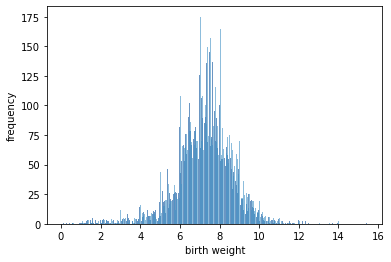

<Figure size 576x432 with 0 Axes>

In [65]:
import thinkstats2
import thinkplot

hist_f = thinkstats2.Hist(firsts.totalwgt_lb)
hist_o = thinkstats2.Hist(others.totalwgt_lb)

width = 0.05
thinkplot.PrePlot(2)
thinkplot.Hist(hist_f, align = 'right', width = width)
thinkplot.Hist(hist_o, align = 'left', width = width)
thinkplot.Show(xlabel = 'birth weight', ylabel = 'frequency')

There is no significant indicator pointing to the conclusion first babies arrive late looking at the data we have been provided. The standard deviation of time that babies spend in the womb is multiple weeks (2.7), and the difference between the means of the two samples is only 13 hours. There are so many other factors that influence when a baby is born, as well as a huge amount of randomness that all contribute more than a baby's birth order. There are a number of health concerns that arise when a baby is born early or late, but the range that is considered "normal" is very large and there is no cause for concern for first-time mothers.

## Exercise 2-4

**Using the variable totalwgt_lb, investigate whether first babies are lighter or heavier
than others. Compute Cohen’s d to quantify the difference between the groups. How
does it compare to the difference in pregnancy length?**

In [30]:
live = preg[preg.outcome == 1]
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

first_wgt_mn = firsts.totalwgt_lb.mean()
other_wgt_mn = others.totalwgt_lb.mean()

print("Mean weight of first babies: " + str(first_wgt_mn) + " pounds.")
print("Mean weight of other babies: " + str(other_wgt_mn) + " pounds.")

Mean weight of first babies: 7.201094430437772 pounds.
Mean weight of other babies: 7.325855614973262 pounds.


**Determining Cohen's D**

In [58]:
import math

def CohenEffectSize(group1, group2):
    diff = group1.mean() - group2.mean()
    var1 = group1.var()
    var2 = group2.var()
    n1 = len(group1)
    n2 = len(group2)
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    v2 = math.sqrt(pooled_var)
    d = diff / v2
    return d

In [60]:
cohen_wgt = CohenEffectSize(firsts.totalwgt_lb, others.totalwgt_lb)

print("Cohen's D effect size: " + str(cohen_wgt))

Cohen's D effect size: -0.088672927072602


When comparing the mean weights between first born babies and later born babies, Cohen's D is -0.09. An effect size of less than ab absolute value of 0.2 is considered to be small, meaning that (unless further tests are done in order to prove significance) there is not a significant difference between the two groups. The negative sign indicates that group 2 exhibits a slightly larger mean total weight, though the small effect size tells us that it is not a large enough effect to cause any worry to expectant mothers.

There is the same concern when looking at mean weight and looking at pregnancy length. Both of these variables have mean values that are slightly different, but using the data provided, we cannot make any conclusions since the effects are so small, they could easily be accounted for due to differences in the population and randomness.